<a href="https://colab.research.google.com/github/DinhHuySang/Traffic-sign-classification/blob/master/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification_from_scratch

/content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification_from_scratch


In [4]:
ls


classification_model.ipynb  sanghandsome.h5  traffic-signs-data.zip  valid.p
README.md                   test.p           train.p


In [0]:
#link_data_set = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"


In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6ce14b832c68b48feb78ff31a8fd17252a94feef9f1237b257bc3e2e88936a50
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

In [0]:
#wget.download(link_data_set)

In [0]:
data = "./"

In [0]:
#!unzip -q traffic-signs-data.zip -d $data


In [0]:
train_link = data+"train.p"
valid_link = data+"valid.p"
test_link  = data+"test.p"


In [0]:
import pickle

In [0]:
with open(train_link, mode="rb") as tr:
  train = pickle.load(tr) 

In [0]:
with open(valid_link, mode="rb") as va:
  valid = pickle.load(va)

In [0]:
with open(test_link, mode="rb") as te:
  test = pickle.load(te)

In [0]:
trainX = train["features"]
trainy = train["labels"]

In [17]:
print(trainX.shape)
print(trainy.shape)

(34799, 32, 32, 3)
(34799,)


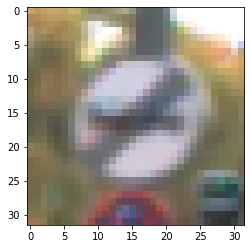

In [18]:
plt.imshow(trainX[100])

In [19]:
trainy[100]

41

In [0]:
classNames = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
    }


In [21]:
classNames[trainy[100]]

'End of no passing'

In [0]:
trainX, trainy = shuffle(trainX,trainy)

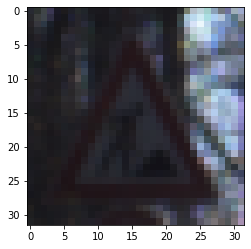

In [23]:
plt.imshow(trainX[100])

In [24]:
classNames[trainy[100]]

'Road work'

In [0]:
validX = valid["features"]
validy = valid["labels"]

In [0]:
testX = test["features"]
testy = test["labels"]

In [27]:
print(validX.shape)
print(validy.shape)

(4410, 32, 32, 3)
(4410,)


In [28]:
print(testX.shape)
print(testy.shape)

(12630, 32, 32, 3)
(12630,)


In [0]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [0]:
lb = LabelBinarizer()

In [0]:
trainy = lb.fit_transform(trainy)

In [0]:
validy = lb.fit_transform(validy)

In [33]:
valid["labels"][100]

31

In [34]:
validy[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import  SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
width = 32
height = 32
classes = 43

In [0]:
model = Sequential()
shape = (width,height,3)
model.add(Conv2D(32,(3,3), padding="same", input_shape=shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)       

In [0]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)

In [0]:
learning_rate = 0.01

In [0]:
epochs = 5
batch_size = 64

In [0]:
opt = SGD(learning_rate = learning_rate, momentum = 0.9)

In [0]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [103]:
print("start trainning")

start trainning


In [104]:
H = model.fit_generator(aug.flow(trainX,trainy,batch_size=batch_size), validation_data=(validX,validy),steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs,verbose=1)

Epoch 1/5
543/543 [==============================] - 26s 48ms/step - loss: 1.8602 - accuracy: 0.4540 - val_loss: 1.8439 - val_accuracy: 0.4673
Epoch 2/5
543/543 [==============================] - 26s 48ms/step - loss: 0.6296 - accuracy: 0.8013 - val_loss: 1.0119 - val_accuracy: 0.6948
Epoch 3/5
543/543 [==============================] - 26s 49ms/step - loss: 0.2792 - accuracy: 0.9135 - val_loss: 0.6712 - val_accuracy: 0.8070
Epoch 4/5
543/543 [==============================] - 26s 49ms/step - loss: 0.1573 - accuracy: 0.9524 - val_loss: 0.5708 - val_accuracy: 0.8535
Epoch 5/5
543/543 [==============================] - 26s 48ms/step - loss: 0.1033 - accuracy: 0.9701 - val_loss: 0.5337 - val_accuracy: 0.8556


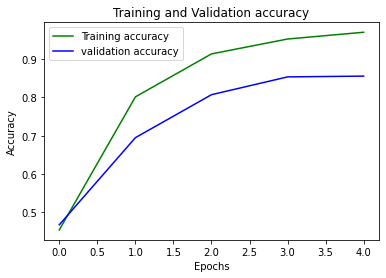

In [105]:
loss_train = H.history['accuracy']
loss_val = H.history['val_accuracy']
epochs = range(5)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

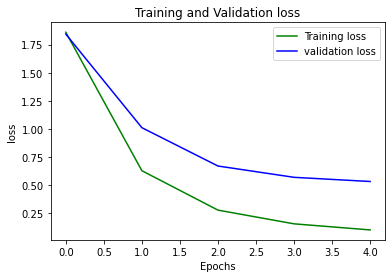

In [106]:
loss_tra = H.history['loss']
loss_va = H.history['val_loss']
epochs = range(5)
plt.plot(epochs, loss_tra, 'g', label='Training loss')
plt.plot(epochs, loss_va, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
model.save("sanghandsome.h5")

In [0]:
save_model = tf.keras.models.load_model("sanghandsome.h5")

In [0]:
result = save_model.predict(testX)

In [110]:
result.shape

(12630, 43)

In [0]:
final = np.argmax(result, axis=1)

In [112]:
final.shape

(12630,)

In [0]:
 from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(testy,final)

0.8768804433887569